意识层数的影响

In [15]:
import re
import os
import glob
import pandas as pd

def extract_final_results_from_log(file_path):
    """从单个日志文件中提取最终结果"""
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            lines = f.readlines()
        
        # 从最后几行查找最终结果
        final_result = None
        for line in reversed(lines[-10:]):  # 检查最后10行
            if "Final Test Set Result" in line or "test-recall" in line and "test-ndcg" in line:
                final_result = line.strip()
                break
        
        if final_result:
            # 使用正则表达式提取数值
            recall_pattern = r'test-recall=\[([\d.]+), ([\d.]+)\]'
            ndcg_pattern = r'test-ndcg=\[([\d.]+), ([\d.]+)\]'
            
            recall_match = re.search(recall_pattern, final_result)
            ndcg_match = re.search(ndcg_pattern, final_result)
            
            if recall_match and ndcg_match:
                return {
                    'filename': os.path.basename(file_path),
                    'recall@20': float(recall_match.group(1)),
                    'recall@40': float(recall_match.group(2)),
                    'ndcg@20': float(ndcg_match.group(1)),
                    'ndcg@40': float(ndcg_match.group(2))
                }
        
        # 如果没找到最终结果行，尝试从最后epoch提取
        for line in reversed(lines):
            if "Epoch 99" in line or "Epoch 100" in line or "Epoch  99" in line:
                # 提取最后epoch的测试结果
                recall_pattern = r'test-recall=\[([\d.]+), ([\d.]+)\]'
                ndcg_pattern = r'test-ndcg=\[([\d.]+), ([\d.]+)\]'
                
                recall_match = re.search(recall_pattern, line)
                ndcg_match = re.search(ndcg_pattern, line)
                
                if recall_match and ndcg_match:
                    return {
                        'filename': os.path.basename(file_path),
                        'recall@20': float(recall_match.group(1)),
                        'recall@40': float(recall_match.group(2)),
                        'ndcg@20': float(ndcg_match.group(1)),
                        'ndcg@40': float(ndcg_match.group(2)),
                        'note': '从最后epoch提取'
                    }
        
        return {'filename': os.path.basename(file_path), 'error': '未找到结果'}
    
    except Exception as e:
        return {'filename': os.path.basename(file_path), 'error': str(e)}

def batch_extract_results(log_files=None, directory=None, pattern="*.log", output_file = "log_results_summary.xlsx"):
    """批量提取多个日志文件的结果"""
    # 获取文件列表
    if log_files:
        files = log_files
    elif directory:
        files = glob.glob(os.path.join(directory, pattern))
    else:
        files = glob.glob(pattern)  # 当前目录下的所有log文件
    
    print(f"找到 {len(files)} 个日志文件")
    
    # 提取所有结果
    results = []
    for file_path in files:
        print(f"处理文件: {os.path.basename(file_path)}")
        result = extract_final_results_from_log(file_path)
        results.append(result)
    
    # 创建DataFrame
    df = pd.DataFrame(results)
    
    # 保存到Excel
    df.to_excel(output_file, index=False)
    
    print(f"\n结果已保存到: {output_file}")
    print("\n结果汇总:")
    print(df.to_string())
    
    # 计算平均指标
    if 'recall@20' in df.columns and df['recall@20'].dtype != object:
        print(f"\n平均指标:")
        print(f"recall@20: {df['recall@20'].mean():.4f}")
        print(f"recall@40: {df['recall@40'].mean():.4f}")
        print(f"ndcg@20: {df['ndcg@20'].mean():.4f}")
        print(f"ndcg@40: {df['ndcg@40'].mean():.4f}")
    
    return df

In [16]:
# 意识层数结果表格
if __name__ == "__main__":
    # 运行批量提取
    batch_extract_results(directory="./log/修改意识层数/", output_file = "./results/log_for_intent.xlsx")

找到 12 个日志文件
处理文件: amazon_128_.log
处理文件: amazon_256_.log
处理文件: amazon_32_.log
处理文件: amazon_64_.log
处理文件: gowalla_128_.log
处理文件: gowalla_256_.log
处理文件: gowalla_32_.log
处理文件: gowalla_64_.log
处理文件: tmall_128_.log
处理文件: tmall_256_.log
处理文件: tmall_32_.log
处理文件: tmall_64_.log

结果已保存到: ./results/log_for_intent.xlsx

结果汇总:
            filename  recall@20  recall@40  ndcg@20  ndcg@40
0    amazon_128_.log     0.0887     0.1343   0.0680   0.0829
1    amazon_256_.log     0.0892     0.1345   0.0683   0.0832
2     amazon_32_.log     0.0812     0.1244   0.0617   0.0760
3     amazon_64_.log     0.0851     0.1292   0.0649   0.0794
4   gowalla_128_.log     0.1839     0.2600   0.1100   0.1299
5   gowalla_256_.log     0.1859     0.2604   0.1106   0.1300
6    gowalla_32_.log     0.1744     0.2484   0.1036   0.1229
7    gowalla_64_.log     0.1799     0.2538   0.1075   0.1267
8     tmall_128_.log     0.0669     0.1042   0.0469   0.0598
9     tmall_256_.log     0.0667     0.1036   0.0464   0.0592
10     tmall_

原始数据:
    dataset  intent_num  recall@20  recall@40  ndcg@20  ndcg@40
2    amazon          32     0.0812     0.1244   0.0617   0.0760
3    amazon          64     0.0851     0.1292   0.0649   0.0794
0    amazon         128     0.0887     0.1343   0.0680   0.0829
1    amazon         256     0.0892     0.1345   0.0683   0.0832
6   gowalla          32     0.1744     0.2484   0.1036   0.1229
7   gowalla          64     0.1799     0.2538   0.1075   0.1267
4   gowalla         128     0.1839     0.2600   0.1100   0.1299
5   gowalla         256     0.1859     0.2604   0.1106   0.1300
10    tmall          32     0.0636     0.0995   0.0443   0.0568
11    tmall          64     0.0647     0.1020   0.0455   0.0584
8     tmall         128     0.0669     0.1042   0.0469   0.0598
9     tmall         256     0.0667     0.1036   0.0464   0.0592

Amazon - 基线值 (intent=128):
  Recall@20: 0.0887
  Recall@40: 0.1343
  NDCG@20: 0.0680
  NDCG@40: 0.0829
  intent=32: Recall@20=0.0812 (-8.46%)
  intent=64: Recall

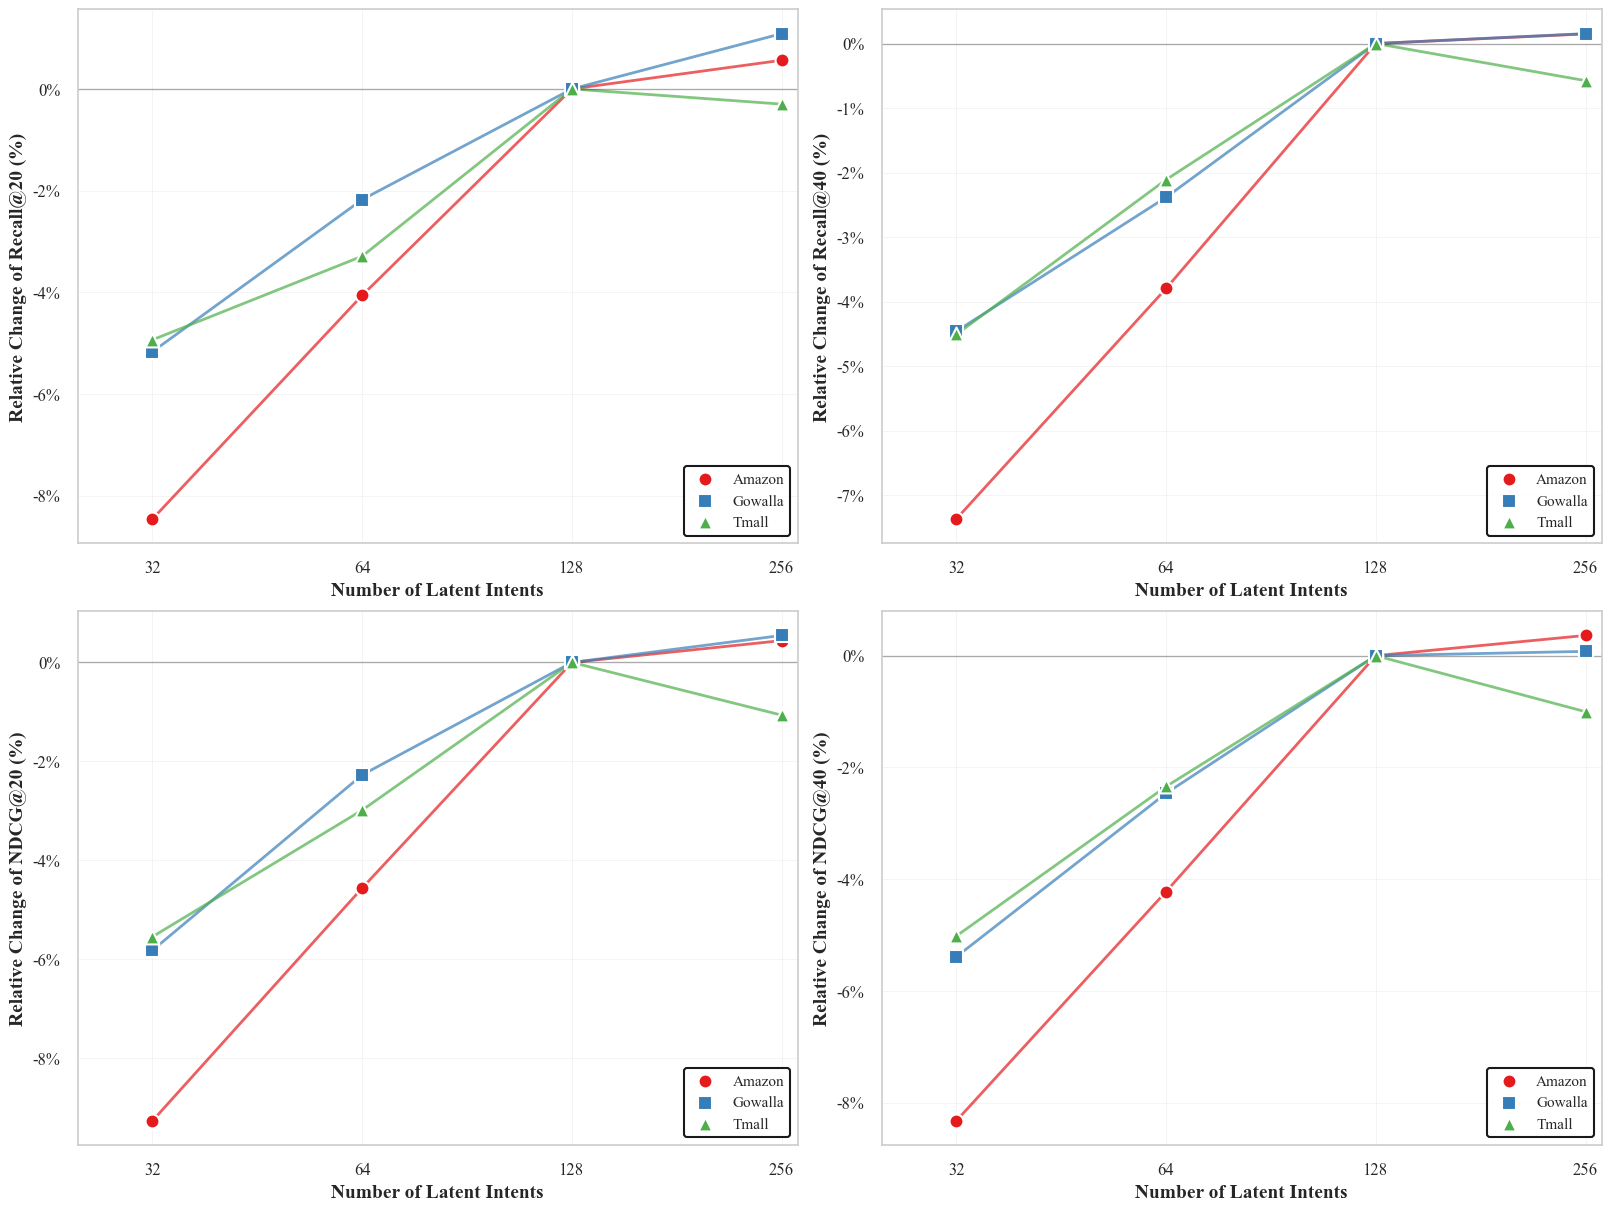


图表已保存到:
esults\intent_performance.png


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置学术图表样式
plt.rcParams.update({
    'font.size': 12,
    'font.family': 'Times New Roman',
    'font.weight': 'normal',
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'axes.titleweight': 'bold',
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'figure.titlesize': 18,
    'figure.titleweight': 'bold',
    'axes.linewidth': 1.2,
    'grid.linewidth': 0.5,
    'grid.alpha': 0.3,
    'lines.linewidth': 2.5,
    'lines.markersize': 10,
})

# 读取Excel文件
df = pd.read_excel(r".\results\log_for_intent.xlsx")

# 提取数据集名称和意图数
df['dataset'] = df['filename'].str.split('_').str[0]
df['intent_num'] = df['filename'].str.split('_').str[1].astype(int)

# 按数据集和意图数排序
df = df.sort_values(['dataset', 'intent_num'])

# 查看原始数据
print("原始数据:")
print(df[['dataset', 'intent_num', 'recall@20', 'recall@40', 'ndcg@20', 'ndcg@40']])

# 数据集显示名称映射
dataset_names = {
    'amazon': 'Amazon',
    'gowalla': 'Gowalla',
    'tmall': 'Tmall'
}

# 计算相对于128基线的变化百分比
baseline_num = 128
results = []

for dataset in df['dataset'].unique():
    dataset_df = df[df['dataset'] == dataset].set_index('intent_num')
    
    # 获取基线值
    if baseline_num in dataset_df.index:
        baseline_recall20 = dataset_df.loc[baseline_num, 'recall@20']
        baseline_recall40 = dataset_df.loc[baseline_num, 'recall@40']
        baseline_ndcg20 = dataset_df.loc[baseline_num, 'ndcg@20']
        baseline_ndcg40 = dataset_df.loc[baseline_num, 'ndcg@40']
        
        print(f"\n{dataset_names.get(dataset, dataset)} - 基线值 (intent={baseline_num}):")
        print(f"  Recall@20: {baseline_recall20:.4f}")
        print(f"  Recall@40: {baseline_recall40:.4f}")
        print(f"  NDCG@20: {baseline_ndcg20:.4f}")
        print(f"  NDCG@40: {baseline_ndcg40:.4f}")
        
        for intent_num in dataset_df.index:
            current_recall20 = dataset_df.loc[intent_num, 'recall@20']
            current_recall40 = dataset_df.loc[intent_num, 'recall@40']
            current_ndcg20 = dataset_df.loc[intent_num, 'ndcg@20']
            current_ndcg40 = dataset_df.loc[intent_num, 'ndcg@40']
            
            # 计算变化百分比 (current - baseline) / baseline * 100
            recall20_change = (current_recall20 - baseline_recall20) / baseline_recall20 * 100
            recall40_change = (current_recall40 - baseline_recall40) / baseline_recall40 * 100
            ndcg20_change = (current_ndcg20 - baseline_ndcg20) / baseline_ndcg20 * 100
            ndcg40_change = (current_ndcg40 - baseline_ndcg40) / baseline_ndcg40 * 100
            
            print(f"  intent={intent_num}: Recall@20={current_recall20:.4f} ({recall20_change:+.2f}%)")
            
            results.append({
                'dataset': dataset,
                'intent_num': intent_num,
                'recall20_change': recall20_change,
                'recall40_change': recall40_change,
                'ndcg20_change': ndcg20_change,
                'ndcg40_change': ndcg40_change
            })

change_df = pd.DataFrame(results)

print("\n变化百分比数据:")
print(change_df)

# 创建图表
fig, axes = plt.subplots(2, 2, figsize=(16, 12), constrained_layout=True)

# 设置颜色和标记样式
colors = {'amazon': '#E41A1C', 'gowalla': '#377EB8', 'tmall': '#4DAF4A'}  # 学术配色
markers = {'amazon': 'o', 'gowalla': 's', 'tmall': '^'}
marker_sizes = {'amazon': 100, 'gowalla': 100, 'tmall': 100}

# 意图数顺序
intent_order = [32, 64, 128, 256]

# 1. Decrease of Recall@20 (%)
ax1 = axes[0, 0]
for dataset in change_df['dataset'].unique():
    dataset_data = change_df[change_df['dataset'] == dataset].sort_values('intent_num')
    dataset_name = dataset_names.get(dataset, dataset)
    
    # 使用散点图+线图
    ax1.plot(dataset_data['intent_num'], dataset_data['recall20_change'], 
             color=colors[dataset], linewidth=2, alpha=0.7)
    ax1.scatter(dataset_data['intent_num'], dataset_data['recall20_change'],
               color=colors[dataset], marker=markers[dataset], s=marker_sizes[dataset],
               edgecolors='white', linewidth=1.5, label=dataset_name, zorder=5)

ax1.set_xlabel('Number of Latent Intents', fontweight='bold')
ax1.set_ylabel('Relative Change of Recall@20 (%)', fontweight='bold')
ax1.axhline(y=0, color='black', linestyle='-', linewidth=1, alpha=0.3)
ax1.grid(True, alpha=0.3)
ax1.set_xscale('log', base=2)
ax1.set_xticks(intent_order)
ax1.set_xticklabels(intent_order)
ax1.set_xlim(25, 270)
# 添加百分比符号到y轴刻度
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.0f}%'))
ax1.legend(loc='lower right', fontsize=11, frameon=True, framealpha=0.9, edgecolor='black')

# 2. Decrease of Recall@40 (%)
ax2 = axes[0, 1]
for dataset in change_df['dataset'].unique():
    dataset_data = change_df[change_df['dataset'] == dataset].sort_values('intent_num')
    dataset_name = dataset_names.get(dataset, dataset)
    
    ax2.plot(dataset_data['intent_num'], dataset_data['recall40_change'], 
             color=colors[dataset], linewidth=2, alpha=0.7)
    ax2.scatter(dataset_data['intent_num'], dataset_data['recall40_change'],
               color=colors[dataset], marker=markers[dataset], s=marker_sizes[dataset],
               edgecolors='white', linewidth=1.5, label=dataset_name, zorder=5)

ax2.set_xlabel('Number of Latent Intents', fontweight='bold')
ax2.set_ylabel('Relative Change of Recall@40 (%)', fontweight='bold')
ax2.axhline(y=0, color='black', linestyle='-', linewidth=1, alpha=0.3)
ax2.grid(True, alpha=0.3)
ax2.set_xscale('log', base=2)
ax2.set_xticks(intent_order)
ax2.set_xticklabels(intent_order)
ax2.set_xlim(25, 270)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.0f}%'))
ax2.legend(loc='lower right', fontsize=11, frameon=True, framealpha=0.9, edgecolor='black')

# 3. Decrease of NDCG@20 (%)
ax3 = axes[1, 0]
for dataset in change_df['dataset'].unique():
    dataset_data = change_df[change_df['dataset'] == dataset].sort_values('intent_num')
    dataset_name = dataset_names.get(dataset, dataset)
    
    ax3.plot(dataset_data['intent_num'], dataset_data['ndcg20_change'], 
             color=colors[dataset], linewidth=2, alpha=0.7)
    ax3.scatter(dataset_data['intent_num'], dataset_data['ndcg20_change'],
               color=colors[dataset], marker=markers[dataset], s=marker_sizes[dataset],
               edgecolors='white', linewidth=1.5, label=dataset_name, zorder=5)

ax3.set_xlabel('Number of Latent Intents', fontweight='bold')
ax3.set_ylabel('Relative Change of NDCG@20 (%)', fontweight='bold')
ax3.axhline(y=0, color='black', linestyle='-', linewidth=1, alpha=0.3)
ax3.grid(True, alpha=0.3)
ax3.set_xscale('log', base=2)
ax3.set_xticks(intent_order)
ax3.set_xticklabels(intent_order)
ax3.set_xlim(25, 270)
ax3.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.0f}%'))
ax3.legend(loc='lower right', fontsize=11, frameon=True, framealpha=0.9, edgecolor='black')

# 4. Decrease of NDCG@40 (%)
ax4 = axes[1, 1]
for dataset in change_df['dataset'].unique():
    dataset_data = change_df[change_df['dataset'] == dataset].sort_values('intent_num')
    dataset_name = dataset_names.get(dataset, dataset)
    
    ax4.plot(dataset_data['intent_num'], dataset_data['ndcg40_change'], 
             color=colors[dataset], linewidth=2, alpha=0.7)
    ax4.scatter(dataset_data['intent_num'], dataset_data['ndcg40_change'],
               color=colors[dataset], marker=markers[dataset], s=marker_sizes[dataset],
               edgecolors='white', linewidth=1.5, label=dataset_name, zorder=5)

ax4.set_xlabel('Number of Latent Intents', fontweight='bold')
ax4.set_ylabel('Relative Change of NDCG@40 (%)', fontweight='bold')
ax4.axhline(y=0, color='black', linestyle='-', linewidth=1, alpha=0.3)
ax4.grid(True, alpha=0.3)
ax4.set_xscale('log', base=2)
ax4.set_xticks(intent_order)
ax4.set_xticklabels(intent_order)
ax4.set_xlim(25, 270)
ax4.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.0f}%'))
ax4.legend(loc='lower right', fontsize=11, frameon=True, framealpha=0.9, edgecolor='black')

# 保存图表
plt.savefig(r'.\results\intent_performance.png', 
            dpi=300, bbox_inches='tight', facecolor='white', edgecolor='none')
plt.show()

print("\n图表已保存到:")
print(".\results\intent_performance.png")



消融模型的结果

In [20]:
# 主程序
if __name__ == "__main__":
    # 运行批量提取
    batch_extract_results(directory="./log/消融最终/", output_file = "./results/log_for_ablation.xlsx")

找到 12 个日志文件
处理文件: amazon_full.log
处理文件: amazon_wo_all_ada.log
处理文件: amazon_wo_disen.log
处理文件: amazon_wo_disen_r.log
处理文件: amazon_wo_local_r.log
处理文件: amazon_wo_ssl_disen.log
处理文件: gowalla_full.log
处理文件: gowalla_wo_all_ada.log
处理文件: gowalla_wo_disen.log
处理文件: gowalla_wo_disen_r.log
处理文件: gowalla_wo_local_r.log
处理文件: gowalla_wo_ssl_disen.log

结果已保存到: ./results/log_for_ablation.xlsx

结果汇总:
                    filename  recall@20  recall@40  ndcg@20  ndcg@40
0            amazon_full.log     0.0889     0.1341   0.0680   0.0828
1      amazon_wo_all_ada.log     0.0832     0.1267   0.0631   0.0775
2        amazon_wo_disen.log     0.0770     0.1193   0.0579   0.0718
3      amazon_wo_disen_r.log     0.0792     0.1224   0.0596   0.0737
4      amazon_wo_local_r.log     0.0786     0.1217   0.0593   0.0734
5    amazon_wo_ssl_disen.log     0.0821     0.1268   0.0626   0.0773
6           gowalla_full.log     0.1841     0.2599   0.1100   0.1298
7     gowalla_wo_all_ada.log     0.1832     0.2584   0.107

In [35]:
import pandas as pd
import numpy as np

# 读取Excel文件
df = pd.read_excel(r'.\results\log_for_ablation.xlsx')

# 定义文件名到变体的映射
filename_mapping = {
    'amazon_full.log': {'variant': 'DCCF', 'category': 'DCCF', 'dataset': 'amazon'},
    'amazon_wo_all_ada.log': {'variant': '-AllAda', 'category': 'SSL', 'dataset': 'amazon'},
    'amazon_wo_disen.log': {'variant': '-Disen', 'category': 'DME', 'dataset': 'amazon'},
    'amazon_wo_disen_r.log': {'variant': '-DisenR', 'category': 'PAM', 'dataset': 'amazon'},
    'amazon_wo_local_r.log': {'variant': '-LocalR', 'category': 'PAM', 'dataset': 'amazon'},
    'amazon_wo_ssl_disen.log': {'variant': '-DisenG', 'category': 'SSL', 'dataset': 'amazon'},
    'gowalla_full.log': {'variant': 'DCCF', 'category': 'DCCF', 'dataset': 'gowalla'},
    'gowalla_wo_all_ada.log': {'variant': '-AllAda', 'category': 'SSL', 'dataset': 'gowalla'},
    'gowalla_wo_disen.log': {'variant': '-Disen', 'category': 'DME', 'dataset': 'gowalla'},
    'gowalla_wo_disen_r.log': {'variant': '-DisenR', 'category': 'PAM', 'dataset': 'gowalla'},
    'gowalla_wo_local_r.log': {'variant': '-LocalR', 'category': 'PAM', 'dataset': 'gowalla'},
    'gowalla_wo_ssl_disen.log': {'variant': '-DisenG', 'category': 'SSL', 'dataset': 'gowalla'}
}

# 创建数据结构
data_dict = {}
for filename, info in filename_mapping.items():
    variant = info['variant']
    category = info['category']
    dataset = info['dataset']
    
    # 从DataFrame中获取数据
    row = df[df['filename'] == filename]
    if not row.empty:
        recall_20 = row['recall@20'].values[0]
        ndcg_20 = row['ndcg@20'].values[0]
        
        if variant not in data_dict:
            data_dict[variant] = {'category': category, 'gowalla': {}, 'amazon': {}}
        
        data_dict[variant][dataset] = {'recall': recall_20, 'ndcg': ndcg_20}

# 按照特定顺序组织数据
variants_order = ['-Disen', '-LocalR', '-DisenR', '-DisenG', '-AllAda', 'DCCF']
category_order = ['DME', 'PAM', 'PAM', 'SSL', 'SSL', 'DCCF']

# 生成LaTeX代码
latex_code = """\\documentclass{article}
\\usepackage[utf8]{inputenc}
\\usepackage{booktabs}   % 必须：绘制专业三线表
\\usepackage{multirow}   % 必须：处理合并行
\\usepackage{array}      % 增强表格功能
\\usepackage{caption}    % 设置标题样式

\\begin{document}

\\begin{table*}[t]
\\centering
\\caption{Ablation study on key components of DCCF (measured by $Recall@20$ and $NDCG@20$) on different datasets.}
\\label{table:ablation}
\\small % 适当缩小字体以适应页面宽度
\\setlength{\\tabcolsep}{6pt} % 调整列间距
\\begin{tabular}{c|l|cc|cc}
\\toprule
\\multirow{2}{*}{Category} & \\multirow{2}{*}{Variants} & \\multicolumn{2}{c|}{Gowalla} & \\multicolumn{2}{c}{Amazon-book} \\\\
\\cmidrule(lr){3-4} \\cmidrule(lr){5-6}
 & & Recall & NDCG & Recall & NDCG \\\\
\\midrule
"""

# 添加数据行
row_counter = 0
for i, variant in enumerate(variants_order):
    if variant in data_dict:
        category = category_order[i]
        gowalla_data = data_dict[variant].get('gowalla', {})
        amazon_data = data_dict[variant].get('amazon', {})
        
        # 检查是否有数据
        if gowalla_data and amazon_data:
            gowalla_recall = gowalla_data.get('recall', 'N/A')
            gowalla_ndcg = gowalla_data.get('ndcg', 'N/A')
            amazon_recall = amazon_data.get('recall', 'N/A')
            amazon_ndcg = amazon_data.get('ndcg', 'N/A')
            
            # 格式化数据为4位小数
            if gowalla_recall != 'N/A':
                gowalla_recall = f"{gowalla_recall:.4f}"
                gowalla_ndcg = f"{gowalla_ndcg:.4f}"
                amazon_recall = f"{amazon_recall:.4f}"
                amazon_ndcg = f"{amazon_ndcg:.4f}"
            
            # 特殊处理DCCF行
            if variant == 'DCCF':
                latex_code += f"\\midrule\n"
                latex_code += f"\\multicolumn{{2}}{{l|}}{{\\textit{{\\textbf{{{category}}}}}}} & \\textbf{{{gowalla_recall}}} & \\textbf{{{gowalla_ndcg}}} & \\textbf{{{amazon_recall}}} & \\textbf{{{amazon_ndcg}}} \\\\\n"
            else:
                # 检查是否需要multirow
                if i > 0 and category == category_order[i-1]:
                    # 与上一行属于同一category，使用multirow
                    if row_counter == 1:
                        # 这是PAM的第二行
                        latex_code += f" & {variant} & {gowalla_recall} & {gowalla_ndcg} & {amazon_recall} & {amazon_ndcg} \\\\\n"
                    elif row_counter == 3:
                        # 这是SSL的第二行
                        latex_code += f" & {variant} & {gowalla_recall} & {gowalla_ndcg} & {amazon_recall} & {amazon_ndcg} \\\\\n"
                    row_counter += 1
                else:
                    # 新的category，需要添加\midrule（除了第一行）
                    if i > 0:
                        latex_code += f"\\midrule\n"
                    
                    if category in ['PAM', 'SSL']:
                        # PAM和SSL有两行，使用multirow
                        row_counter = 0
                        latex_code += f"\\multirow{{2}}{{*}}{{{category}}} & {variant} & {gowalla_recall} & {gowalla_ndcg} & {amazon_recall} & {amazon_ndcg} \\\\\n"
                        row_counter += 1
                    else:
                        # DME只有一行
                        latex_code += f"{category} & {variant} & {gowalla_recall} & {gowalla_ndcg} & {amazon_recall} & {amazon_ndcg} \\\\\n"

latex_code += """\\bottomrule
\\end{tabular}
\\end{table*}

\\end{document}
"""

# 保存LaTeX文件
with open('ablation_table.tex', 'w', encoding='utf-8') as f:
    f.write(latex_code)

print("LaTeX代码已保存到 ablation_table.tex")
print("\n以下是生成的LaTeX代码内容:")
print("=" * 80)
print(latex_code)
print("=" * 80)

# 显示提取的数据用于验证
print("\n从Excel提取的数据:")
print("=" * 80)
for variant in variants_order:
    if variant in data_dict:
        print(f"{variant}:")
        print(f"  Category: {data_dict[variant]['category']}")
        if 'gowalla' in data_dict[variant]:
            print(f"  Gowalla - Recall: {data_dict[variant]['gowalla'].get('recall', 'N/A'):.4f}, NDCG: {data_dict[variant]['gowalla'].get('ndcg', 'N/A'):.4f}")
        if 'amazon' in data_dict[variant]:
            print(f"  Amazon - Recall: {data_dict[variant]['amazon'].get('recall', 'N/A'):.4f}, NDCG: {data_dict[variant]['amazon'].get('ndcg', 'N/A'):.4f}")
        print()

LaTeX代码已保存到 ablation_table.tex

以下是生成的LaTeX代码内容:
\documentclass{article}
\usepackage[utf8]{inputenc}
\usepackage{booktabs}   % 必须：绘制专业三线表
\usepackage{multirow}   % 必须：处理合并行
\usepackage{array}      % 增强表格功能
\usepackage{caption}    % 设置标题样式

\begin{document}

\begin{table*}[t]
\centering
\caption{Ablation study on key components of DCCF (measured by $Recall@20$ and $NDCG@20$) on different datasets.}
\label{table:ablation}
\small % 适当缩小字体以适应页面宽度
\setlength{\tabcolsep}{6pt} % 调整列间距
\begin{tabular}{c|l|cc|cc}
\toprule
\multirow{2}{*}{Category} & \multirow{2}{*}{Variants} & \multicolumn{2}{c|}{Gowalla} & \multicolumn{2}{c}{Amazon-book} \\
\cmidrule(lr){3-4} \cmidrule(lr){5-6}
 & & Recall & NDCG & Recall & NDCG \\
\midrule
DME & -Disen & 0.1623 & 0.0964 & 0.0770 & 0.0579 \\
\midrule
\multirow{2}{*}{PAM} & -LocalR & 0.1692 & 0.0996 & 0.0786 & 0.0593 \\
 & -DisenR & 0.1688 & 0.0995 & 0.0792 & 0.0596 \\
\midrule
\multirow{2}{*}{SSL} & -DisenG & 0.1736 & 0.1038 & 0.0821 & 0.0626 \\
 & -AllAda & 0